In [3]:
import networkx as nx
import random as rn
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter ####
import sys


In [4]:
# OLVAS
# G = nx.karate_club_graph()
G = nx.read_edgelist("deezer_clean_data/HU_edges.csv", nodetype=int, comments="%", delimiter=",", data=False)
# G = nx.read_edgelist("actor-collaboration/out.actor-collaboration", nodetype=int, comments='%')
# G = nx.read_edgelist("ca-AstroPh/out.ca-AstroPh", nodetype=int, comments='%')
# G = nx.read_edgelist("14_soc-hamsterster.edges", nodetype=int)
# G = nx.dense_gnm_random_graph(100,1000)
# plt.show()
# nx.draw(G, with_labels=False)

# 
nV = nx.number_of_nodes(G)
print("összefüggőség -> " + str( nx.is_connected(G) ) )
print("csúcszám -> " + str( nV ))
print("min/max csúcs-index -> ", min(G.nodes()), max(G.nodes()))

def előzetes(G): # a csúcsok indexelése 0...csúcsok száma -1 legyen
  nodes=list(G.nodes())
  if len(nodes)-1==max(nodes) and min(nodes)==0:
    return True
  return False

print(előzetes(G))
  
      

összefüggőség -> True
csúcszám -> 47538
min/max csúcs-index ->  0 47537
True


In [5]:
def labProp(G, sorrend, csatlakozás, th=0.0):
  nE=G.number_of_edges()
  osztály = list(range(G.number_of_nodes()))
  osztályméret=[1 for _ in range(G.number_of_nodes())] 
  feszültség=[2*G.number_of_edges()] # azon fokszámok összege melyekre nem teljesül a maximalitási feltétel
  nodes=list(G.nodes())

  def egyKör():
    volt=False
    sorrend(nodes)
    for v in nodes:
      (váltás, különbség) = csatlakozás(G,v,osztály,osztályméret)
      if váltás == True:
        M = feszültség[-1]-különbség
        feszültség.append(M)
        volt = True
    return volt

  while egyKör() == True and feszültség[-1]/(2*nE)>th:
      pass

  return (osztály, feszültség)
  #return szín
      

70 4449 0.5044843351115139


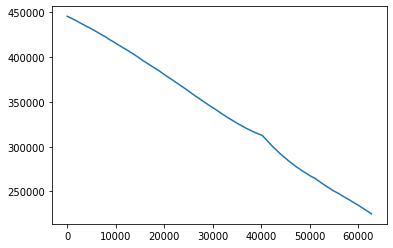

In [6]:
# sorrendek:
véletlen=lambda x: rn.shuffle(x)
sima=lambda x: None

# csatlakozások:
def mohó(G, v, osztály, osztályméret): # a legnagyobbak közül választ
  gyakoriság = Counter([ osztály[ szomszéd ] for szomszéd in G.neighbors(v)])
  sajátgyak = gyakoriság[ osztály[v] ]
  maxgyak = max( gyakoriság.values() )
  if sajátgyak < maxgyak:
    maxhelyek = [ k for k in gyakoriság.keys() if gyakoriság[k]==maxgyak ]
    osztály[v] = maxhelyek[ rn.randint(0,len(maxhelyek)-1) ]
    return (True, 2*(maxgyak-sajátgyak))
  return (False, None)

def óvatos(G, v, osztály, osztályméret): # valamelyik nagyobbat választja
  gyakoriság = Counter([ osztály[ szomszéd ] for szomszéd in G.neighbors(v)])
  sajátgyak = gyakoriság[ osztály[v] ]
  maxgyak = max( gyakoriság.values() )
  if sajátgyak < maxgyak:
    nagyobbak = [ k for k in gyakoriság.keys() if gyakoriság[k]>sajátgyak ]
    osztály[v] = nagyobbak[ rn.randint(0,len(nagyobbak)-1) ]
    return (True, 2*(gyakoriság[osztály[v]]-sajátgyak))
  return (False, None)


sys.setrecursionlimit(nV+100)
def utómunka(G, osztály): # átcimkézés, nemösszefüggő azonos színek módosítása
  újo=0
  régio=0
  def bejár(v):
    for szomszéd in G.neighbors(v):
      if osztály[szomszéd]==régio:
        osztály[szomszéd]=újo
        bejár(szomszéd)

  for v in G.nodes():
    if osztály[v]>=0: # még nem járt itt
      régio=osztály[v]
      újo-=1
      osztály[v]=újo
      bejár(v)

  for v in G.nodes():
    osztály[v]= -osztály[v]-1 # 0...osztályok száma-1


(osztály, feszültség) = labProp(G, sima, mohó, 0.1)
plt.plot(range(len(feszültség)),feszültség, ms=10)
marad0 = len(set(osztály))
utómunka(G,osztály)
marad = len(set(osztály))
print(marad-marad0, marad, feszültség[-1]/(2*G.number_of_edges()))    


In [98]:
#print(osztály)

136 164 0.06110401268013392


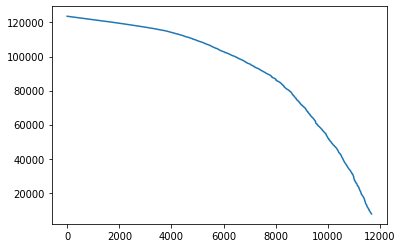

In [18]:
def részgráf(G,osztály):
  hG=nx.Graph()
  ret=[[0,0,0] for _ in range(1+max(osztály))] 
  for v in G.nodes():
    vo=osztály[v]
    szo=set([osztály[szomszéd] for szomszéd in G.neighbors(v) if osztály[szomszéd] != vo])
    degv=sum([osztály[szomszéd]==vo for szomszéd in G.neighbors(v)]) 
    ret[vo][0]+=degv 
    ret[vo][1]+=degv*degv 
    ret[vo][2]+=1
    for w in szo:
      hG.add_edge(vo,w)
    
  return ret, hG


_, hG=részgráf(G,osztály)

(osztály2, feszültség2) = labProp(hG, véletlen, óvatos, 0.15)
plt.plot(range(len(feszültség2)),feszültség2, ms=10)
marad0 = len(set(osztály2))
utómunka(hG,osztály2)
marad = len(set(osztály2))
print(marad-marad0, marad, feszültség2[-1]/(2*hG.number_of_edges()))    


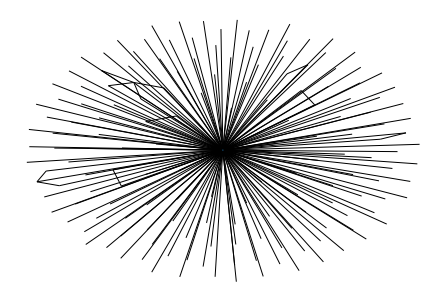

In [19]:
ret,hhG=részgráf(hG,osztály2)
nG=G.number_of_nodes()
s=[ret[i][2]/nG for i in range(len(ret))]
nx.draw_spring(hhG, node_size=s)

In [100]:
prexy=[v for v in eredm if v[2]!=0]

NameError: name 'eredm' is not defined

In [21]:
f=lambda x: [math.log(x[0]/(math.log(x[2])+1)), math.log(x[1]/(math.log(x[2])+1))]
xy=list(map(f,prexy))


In [22]:
from sklearn.linear_model import LinearRegression
x = np.asarray([[p[0]] for p in xy])
y = np.asarray([p[1] for p in xy])
model = LinearRegression().fit(x, y)
predict_y = model.predict(x)
b0=model.intercept_
b1=model.coef_
print('y =', b0, " + ", b1[0], " * x")


y = 0.02373396276655315  +  1.5069671341919677  * x


In [23]:
r_sq = model.score(x, y)
print('corr: ', end=' ')
print(format(np.corrcoef([p[0] for p in xy],[p[1] for p in xy])[0,1],'.4f'), end='     ')
print('coef: ', end=' ')
print(format( r_sq, '.4f'))

print('max: ', end='')
print(format(np.max(y-predict_y), '.4f'),end='     ')
rss=np.average(np.square(y-predict_y))
print('rss: ', end='')
print(format(rss,'.4f'))

corr:  0.9946     coef:  0.9893
max: 0.5111     rss: 0.0369


In [24]:
#plt.show()
#nx.draw(G, with_labels=False, node_color = oszt)
#plt.savefig("15_soc-hamsterster.edges_network.png")

#plt.scatter([p[0] for p in xy],[p[1] for p in xy])
#t = np.arange(0., 4, 0.2)
#plt.plot(t, b0+b1*t, 'r--')
#plt.axis([0, 5, 0, 5])
#plt.savefig("14_soc-hamsterster.png")


max: 0.5111     rss: 0.0369


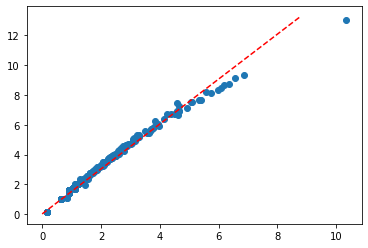

In [25]:
plt.scatter(x,y)
#plt.scatter(x,predict_y)

print('max: ', end='')
print(format(np.max(y-predict_y), '.4f'),end='     ')
#rss=np.average(np.square(y-predict_y))
print('rss: ', end='')
print(format(rss,'.4f'))
#plt.axis([0, 5, 0, 9])

t = np.arange(0., 9, 0.2)
plt.plot(t, b0+b1*t, 'r--')
#plt.savefig("14_soc-hamsterster_line.png")

